In [1]:

# agrega ruta de busqueda donde tenemos archivos .py
import sys
FUENTES_DIR = "../../Recursos"
sys.path.append(FUENTES_DIR)

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pylab as plt
from IPython import display

import grafica as gr
# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3]

In [3]:
# Ejemplos de entrada 
X = np.array([[-1,3], [3,1], [1,0], [3,3], [0,1], [2,4], [-1,1], [2,5]])

CantEjemplos = X.shape[0]
#X = 2 * X - 1

#-- Respuesta esperada para cada ejemplo
T = np.array([0, 1, 0, 1, 0, 1, 0, 1])
T = 2*T-1

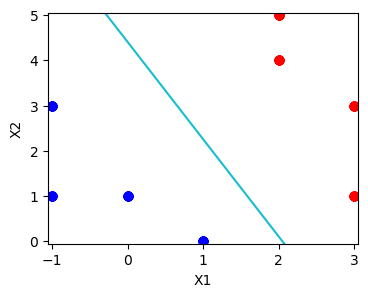

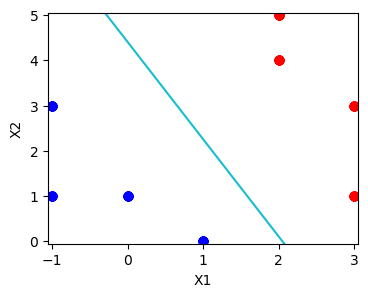

In [4]:
# --- titulos y ph se utilizan sólo para dibujar ---
titulos = ['X1', 'X2']
ph=0


#--- Los pesos iniciales son aleatorios
W = np.array(np.random.uniform(-0.5, 0.5, size=2))
b = np.random.uniform(-0.5, 0.5)

#--- al finalizar ERRORES debe contener la cantidad de cambios realizados en c/iteración ---
errores = []

#--- parámetros del PERCEPTRON ---
MAX_ITE = 40
alfa = 0.1
COTA = 10e-6

# --- Entrenamiento del PERCEPTRON ---
ite = 0
ErrorAVG = 1
Error_ant = 0
errores = []
while (ite < MAX_ITE) and ( np.abs(ErrorAVG-Error_ant)>COTA):
    Error_ant = ErrorAVG
    suma = 0
    for e in range(CantEjemplos):
        neta = W[0]*X[e,0] + W[1]*X[e,1] + b
        
        y = 2/(1+ np.exp(-2*neta)) - 1
        deriv = 1 - y*y
        
        Error = T[e]-y
        
        W[0]= W[0]+ alfa * Error * deriv * X[e,0]
        W[1]= W[1]+ alfa * Error * deriv * X[e,1]
        b = b + alfa * Error * deriv
        
        suma = suma + Error*Error
        
    ErrorAVG = suma / CantEjemplos    
    
    errores.append(ErrorAVG)
    
    # dibujar nuevamente la recta            
    ph = gr.dibuPtosRecta(X,T, W, b, titulos, ph) 
    ite = ite+1
      

In [5]:
print(W)
print(b)

[0.89422077 0.41603438]
-1.8330679351917267


In [6]:
print(X)
print(T)

[[-1  3]
 [ 3  1]
 [ 1  0]
 [ 3  3]
 [ 0  1]
 [ 2  4]
 [-1  1]
 [ 2  5]]
[-1  1 -1  1 -1  1 -1  1]


In [7]:
netas = W @ X.T+b
y = 1 / (1+ np.exp(-netas))
print(netas)
print(y)

[-1.47918557  1.26562876 -0.93884716  2.09769752 -1.41703356  1.61951113
 -2.31125433  2.03554551]
[0.18555047 0.77999355 0.28113327 0.89067919 0.19512705 0.8347277
 0.09019516 0.8844789 ]


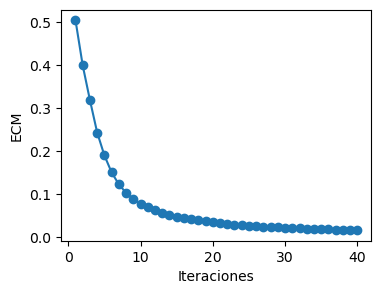

In [8]:
plt.figure()
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()

In [9]:
from PlotRegiones import plot_decision_regions

plot_decision_regions(X, T, classifier=ppn)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper right')
plt.show()

NameError: name 'ppn' is not defined